Warning in <TCanvas::Constructor>: Deleting canvas with same name: Calo Plots


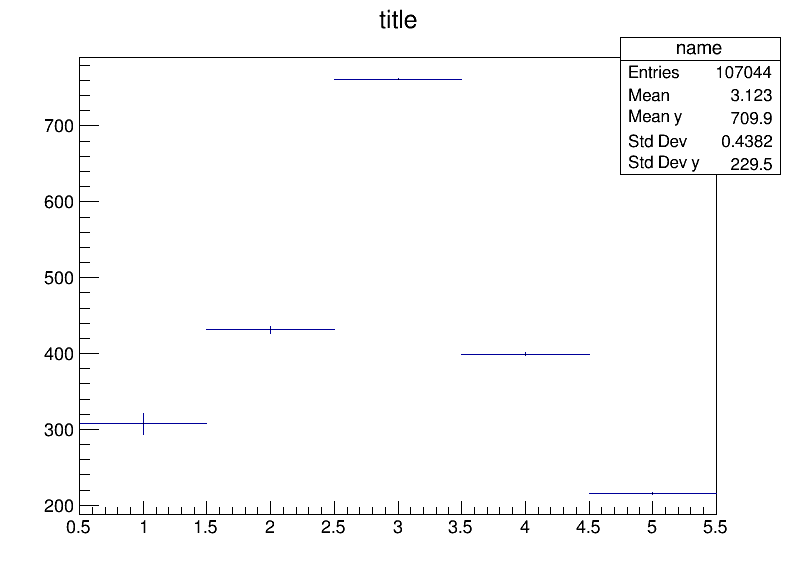

In [8]:
from ROOT import TFile, TProfile, TCanvas, TH1D

c1=TCanvas("Calo Plots", "CaloPlots", 800, 600)

runNumber=1571932015

c1.cd(1)
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumber) + ".root", "READ")
RAWdata=importFile.Get("RAWdata")
tProf=TProfile("name", "title", 5, 0.5, 5.5)

caloPlace={5:1, 1:2, 2:3, 3:4, 4:5}
for event in RAWdata:
    for i in [5, 1, 2, 3, 4]:
        value = getattr(event, "QDC0_ch"+str(i))
        if value>200:
            tProf.Fill(caloPlace[i], value)

tProf.Draw("colz")
c1.Draw()

In [ ]:
for 

(0.273809, 0.031497, 0.358853, 1.0)


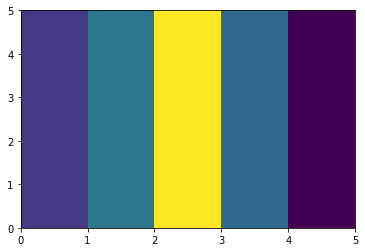

In [17]:
from matplotlib.patches import Rectangle
#from matplotlib import colors
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

data=[]
for i in range(1, 6):
    data+=[tProf.GetBinContent(i)]
data=np.interp(data, (np.amin(data), np.max(data)), (0, +1))

someX, someY = 0.5, 0.5
plt.figure()
currentAxis = plt.gca()
currentAxis.set(xlim=(0, 5), ylim=(0, 5))
#plt.sca(3)

#num_vals=length(x) # substitute nrow  for length if you have rows instead of a list
col_pal = cm.viridis(5)
print(col_pal)

currentAxis.add_patch(Rectangle((0, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[0]))) #facecolor=col_pal[0]))
currentAxis.add_patch(Rectangle((1, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[1]))) #facecolor=col_pal[0]))
currentAxis.add_patch(Rectangle((2, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[2]))) #facecolor=col_pal[0]))
currentAxis.add_patch(Rectangle((3, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[3]))) #facecolor=col_pal[0]))
currentAxis.add_patch(Rectangle((4, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[4]))) #facecolor=col_pal[0]))

In [22]:
#Now, given a run number we can ouput something that shows which calorimeters were hit, using the TProfile

(414.4233687405159, 6.026888081103667)
(1962.0394744304754, 7.581739759408376)
(244.12890553066111, 5.49769638714634)
(287.85074626865674, 5.662442103679363)
(215.20669577874818, 5.371598942017106)

(383.2334710743802, 5.948644388509751)
(502.3560910307898, 6.2193092129085485)
(484.1348871745177, 6.182363560398422)
(1726.8230994476364, 7.454038640617353)
(343.7936648904677, 5.840041666049678)

(337.6155419222904, 5.82190779816183)
(495.7052518756699, 6.205981499837601)
(1289.1700303682146, 7.161753902981821)
(727.526423861263, 6.58965031984482)
(261.2318676337262, 5.565408394683606)

(316.2352, 5.7564862405276775)
(470.7853378054624, 6.154402231752188)
(2883.8089733520646, 7.9668672595093115)
(273.4758075696659, 5.611213162994148)
(214.63336630398945, 5.368931299489883)

(438.18217011995637, 6.082634737424277)
(693.7291958635136, 6.542081676666512)
(343.2013943847748, 5.838317430498254)
(314.0064724919094, 5.749413598727366)
(224.68973747016707, 5.414720506008391)

(310.02430555555554,

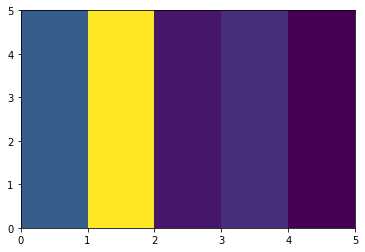

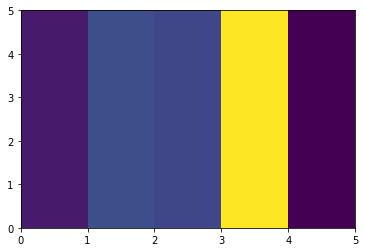

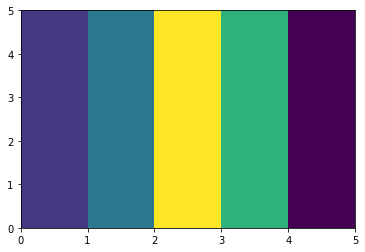

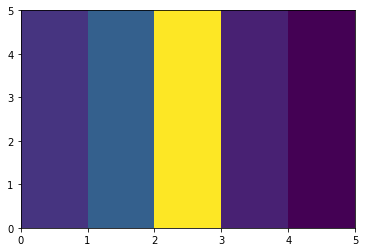

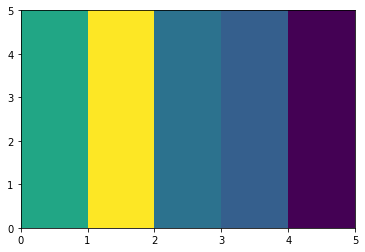

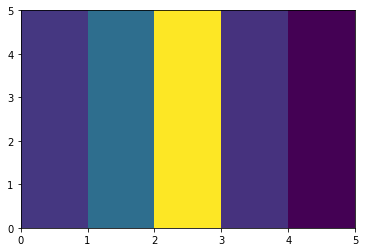

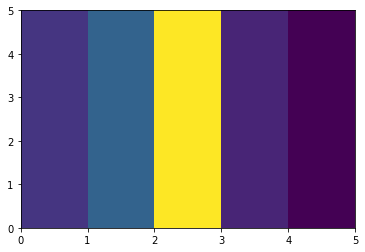

In [26]:
from ROOT import TFile, TProfile, TCanvas, TH1D
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math

runNumber=1571937854

runNumbersE=["1571906107", 
             "1571933143", 
             "1571932668", 
             "1571934315",  
             "1571937854", 
             "1571939524", 
             "1571950975"]

for runNumber in runNumbersE:

    #Import the file
    importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumber) + ".root", "READ")
    RAWdata=importFile.Get("RAWdata")
    tProf=TProfile("name", "title", 5, 0.5, 5.5)

    #Define the locations of the calorimeters and make a TProfile
    caloPlace={5:1, 1:2, 2:3, 3:4, 4:5}
    for event in RAWdata:
        for i in [5, 1, 2, 3, 4]:
            value = getattr(event, "QDC0_ch"+str(i))
            if value>200: #Think about the pedestal
                tProf.Fill(caloPlace[i], value)

    #Normalize the data to a 0-1 range
    data=[]
    for i in range(1, 6):
        data+=[math.log(tProf.GetBinContent(i))]
        print((tProf.GetBinContent(i), math.log(tProf.GetBinContent(i))))
    data=np.interp(data, (np.amin(data), np.max(data)), (0, +1))

    #Create the figure
    plt.figure()
    currentAxis = plt.gca()
    currentAxis.set(xlim=(0, 5), ylim=(0, 5))

    #Make rectangles for each calorimeter
    currentAxis.add_patch(Rectangle((0, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[0]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((1, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[1]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((2, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[2]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((3, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[3]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((4, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[4]))) #facecolor=col_pal[0]))
    
    print()

In [36]:
importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571933143.root", "READ")
RAWdata=importFile.Get("RAWdata")
c1=TCanvas("Calo Plots", "CaloPlots", 4000, len(runNumbersE)*600)
c1.Divide(5, len(runNumbersE))
hist1=TH1D("name", "Raw Data", 100, 0, 4100)
hi=RAWdata.Draw("QDC0_ch3>>name", "QDC0_ch0>300 && QDC0_ch0<3800 && QDC0_ch3>230")
print(hist1.GetEntries())

73455.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Calo Plots


Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: name (Potential memory leak).
Warning in <TFil

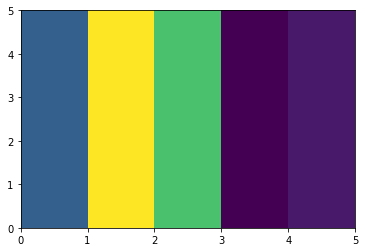

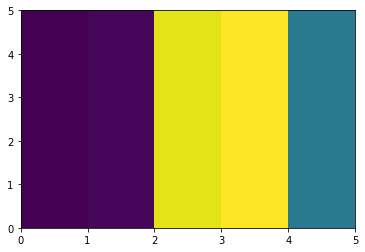

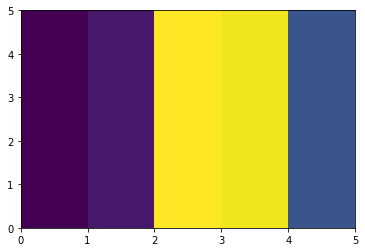

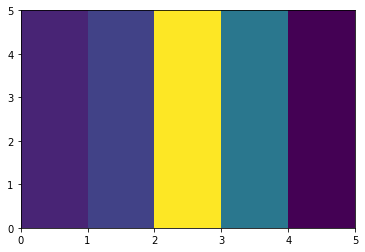

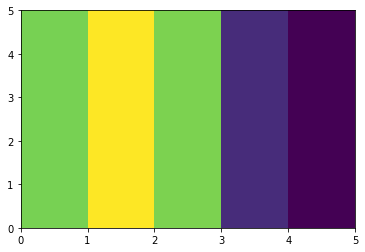

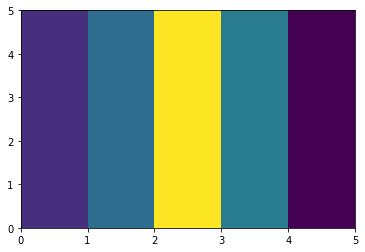

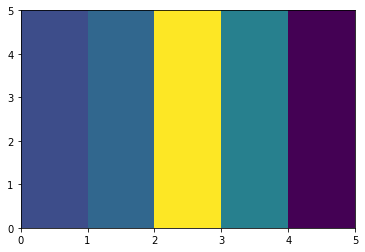

In [50]:
#But it would also be nice to be able to use the number of events with some conditions (e.g. it hit the scintillator and all)
from ROOT import TFile, TProfile, TCanvas, TH1D
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math

runNumbersE=["1571906107", "1571933143", "1571932668", "1571934315", "1571937854", "1571939524", "1571950975"]

for runNumber in runNumbersE:

    #Import the file
    importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumber) + ".root", "READ")
    RAWdata=importFile.Get("RAWdata")
    

    eventNums=[]
    #Make a list of the number of events
    for i in [5, 1, 2, 3, 4]:
        hist1=TH1D("name", "Raw Data", 100, 0, 4100)
        RAWdata.Draw("QDC0_ch" + str(i) + ">>name", "QDC0_ch0>300 && QDC0_ch0<3800 && QDC0_ch" + str(i) + ">230") #We plot it to a histogram so we can make a cut
        eventNums+=[hist1.GetEntries()] #Then get the number of entries
    
    #Normalize the data to a 0-1 range
    data=[math.log(i) for i in eventNums] #taking the log shows a little better the spread
    data=np.interp(data, (np.amin(data), np.max(data)), (0, +1)) #Normalize the data to a 0 to 1 range

    #Create the figure
    plt.figure()
    currentAxis = plt.gca()
    currentAxis.set(xlim=(0, 5), ylim=(0, 5)) #Set the axes

    #Make rectangles for each calorimeter
    currentAxis.add_patch(Rectangle((0, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[0]))) 
    currentAxis.add_patch(Rectangle((1, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[1]))) 
    currentAxis.add_patch(Rectangle((2, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[2]))) 
    currentAxis.add_patch(Rectangle((3, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[3]))) 
    currentAxis.add_patch(Rectangle((4, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[4]))) 
    
    print()

Welcome to JupyROOT 6.22/02
(414.4233687405159, 6.026888081103667)
(1962.0394744304754, 7.581739759408376)
(244.12890553066111, 5.49769638714634)
(287.85074626865674, 5.662442103679363)
(215.20669577874818, 5.371598942017106)

(416.07931570762054, 6.030875904846133)
(3096.464027558166, 8.038016103181027)
(248.82536164973837, 5.516751291561146)
(289.7325581395349, 5.668958284168253)
(212.5538178472861, 5.359195216757272)

(301.23021582733816, 5.7078748090460625)
(449.2910798122066, 6.107670962356232)
(1927.4412013644874, 7.563948599843523)
(289.6641586867305, 5.668722178401217)
(214.19230769230768, 5.366874245568186)

(336.88030888030886, 5.819727700738519)
(468.1747572815534, 6.148841639211137)
(2927.734736030404, 7.98198427535914)
(261.8069724770642, 5.567607485959441)
(216.93286713286713, 5.379587937624988)

(296.6467065868263, 5.692541890626595)
(317.10869565217394, 5.759244603597118)
(269.8742795389049, 5.597956219221051)
(1979.4966505204575, 7.5905978744611255)
(231.88257408226448

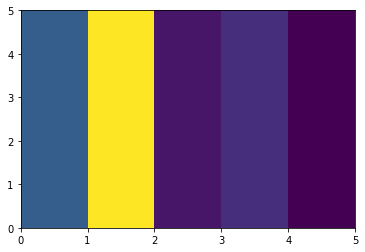

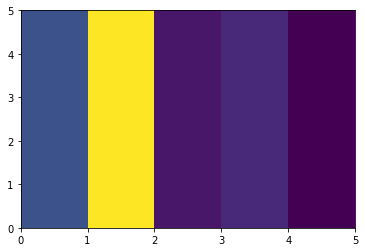

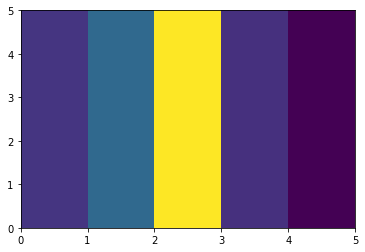

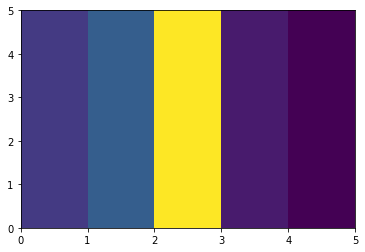

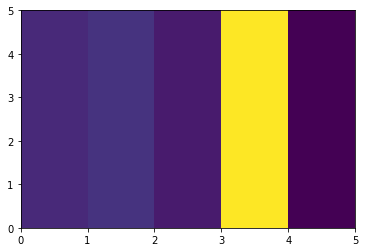

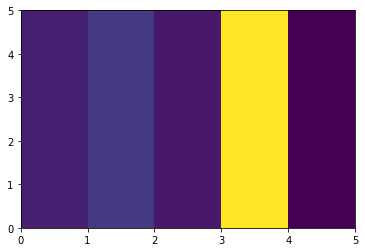

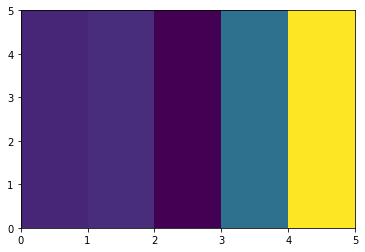

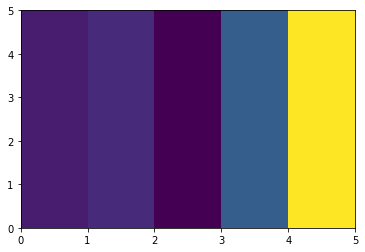

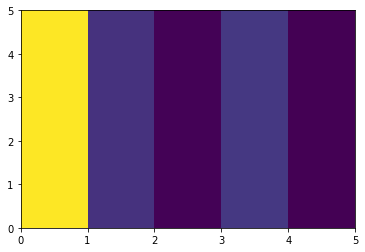

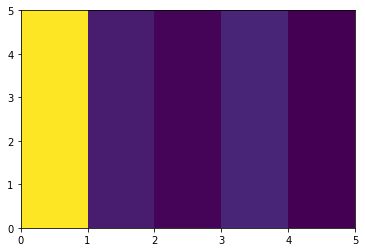

In [1]:
#August's edited version of the above to check data for calorimeter calibration runs

from ROOT import TFile, TProfile, TCanvas, TH1D
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math

runNumber=1571937854

runNumbersE=["1571906107", 
             "1571906358", 
             "1571906955", 
             "1571906677",  
             "1571907163", 
             "1571907343", 
             "1571907892", 
             "1571907628",
             "1571905775",
             "1571905465"]

for runNumber in runNumbersE:

    #Import the file
    importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + str(runNumber) + ".root", "READ")
    RAWdata=importFile.Get("RAWdata")
    tProf=TProfile("name", "title", 5, 0.5, 5.5)

    #Define the locations of the calorimeters and make a TProfile
    caloPlace={5:1, 1:2, 2:3, 3:4, 4:5}
    for event in RAWdata:
        for i in [5, 1, 2, 3, 4]:
            value = getattr(event, "QDC0_ch"+str(i))
            if value>200: #Think about the pedestal
                tProf.Fill(caloPlace[i], value)

    #Normalize the data to a 0-1 range
    data=[]
    for i in range(1, 6):
        data+=[math.log(tProf.GetBinContent(i))]
        print((tProf.GetBinContent(i), math.log(tProf.GetBinContent(i))))
    data=np.interp(data, (np.amin(data), np.max(data)), (0, +1))

    #Create the figure
    plt.figure()
    currentAxis = plt.gca()
    currentAxis.set(xlim=(0, 5), ylim=(0, 5))

    #Make rectangles for each calorimeter
    currentAxis.add_patch(Rectangle((0, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[0]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((1, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[1]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((2, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[2]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((3, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[3]))) #facecolor=col_pal[0]))
    currentAxis.add_patch(Rectangle((4, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[4]))) #facecolor=col_pal[0]))
    
    print()